In [1]:
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
import scipy
import re
# For handling string
import string
# For performing mathematical operations
import math
import nltk 

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/John/Documents/MMA/Big Data/Assignments/Individual/sentiment_train.csv")
df.head(5)

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df["no_punct"] = df['Sentence'].str.replace('[^\w\s]','')
df.head(n=20)

,Sentence,Polarity,no_punct
0,Wow... Loved this place.,1,Wow Loved this place
1,Crust is not good.,0,Crust is not good
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho
6,Honeslty it didn't taste THAT fresh.),0,Honeslty it didnt taste THAT fresh
7,The potatoes were like rubber and you could te...,0,The potatoes were like rubber and you could te...
8,The fries were great too.,1,The fries were great too
9,A great touch.,1,A great touch


In [4]:
df['lowered_text']=df['no_punct'].apply(lambda x: x.lower())
df.head()

,Sentence,Polarity,no_punct,lowered_text
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place
1,Crust is not good.,0,Crust is not good,crust is not good
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...


In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['StopwordsCount'] = df['lowered_text']
df['StopwordsCount'] = df['StopwordsCount'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Polarity,no_punct,lowered_text,StopwordsCount
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,1
1,Crust is not good.,0,Crust is not good,crust is not good,2
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,5
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,6
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,8


In [6]:
df['reviewTextnoStop'] = df['lowered_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(5)

,Sentence,Polarity,no_punct,lowered_text,StopwordsCount,reviewTextnoStop
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,1,wow loved place
1,Crust is not good.,0,Crust is not good,crust is not good,2,crust good
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,5,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,6,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,8,selection menu great prices


In [7]:
df.shape

(2202, 6)

In [8]:
#Word Count
df['word_count'] = df['no_punct'].apply(lambda x: len(str(x).split(" ")))
df[['no_punct','word_count']].head()

,no_punct,word_count
0,Wow Loved this place,4
1,Crust is not good,4
2,Not tasty and the texture was just nasty,8
3,Stopped by during the late May bank holiday of...,15
4,The selection on the menu was great and so wer...,12


In [9]:
df['non_stop_count'] = df['word_count'] - df['StopwordsCount']
df.head(5)

,Sentence,Polarity,no_punct,lowered_text,StopwordsCount,reviewTextnoStop,word_count,non_stop_count
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,1,wow loved place,4,3
1,Crust is not good.,0,Crust is not good,crust is not good,2,crust good,4,2
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,5,tasty texture nasty,8,3
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,6,stopped late may bank holiday rick steve recom...,15,9
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,8,selection menu great prices,12,4


In [10]:
df = df.drop(['Sentence'], axis=1)
df = df.drop(['no_punct'], axis=1)
df = df.drop(['lowered_text'], axis=1)
df.head(5)

,Polarity,StopwordsCount,reviewTextnoStop,word_count,non_stop_count
0,1,1,wow loved place,4,3
1,0,2,crust good,4,2
2,0,5,tasty texture nasty,8,3
3,1,6,stopped late may bank holiday rick steve recom...,15,9
4,1,8,selection menu great prices,12,4


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df=0.05, max_features = 1000, ngram_range=[1,3])
dtm = vectorizer.fit_transform(df['reviewTextnoStop'])
df.head(5)

,Polarity,StopwordsCount,reviewTextnoStop,word_count,non_stop_count
0,1,1,wow loved place,4,3
1,0,2,crust good,4,2
2,0,5,tasty texture nasty,8,3
3,1,6,stopped late may bank holiday rick steve recom...,15,9
4,1,8,selection menu great prices,12,4


In [12]:
dtm.shape

(2202, 4)

In [13]:
vectorizer.get_feature_names()

['food', 'good', 'great', 'phone']

In [14]:
bow_df = pd.DataFrame(dtm.toarray(), 
                      columns=vectorizer.get_feature_names(), 
                      index=df.index)

final_df_bow = pd.concat([df, bow_df], axis=1)
final_df_bow.shape
final_df_bow.head()

,Polarity,StopwordsCount,reviewTextnoStop,word_count,non_stop_count,food,good,great,phone
0,1,1,wow loved place,4,3,0.0,0.0,0.0,0.0
1,0,2,crust good,4,2,0.0,1.0,0.0,0.0
2,0,5,tasty texture nasty,8,3,0.0,0.0,0.0,0.0
3,1,6,stopped late may bank holiday rick steve recom...,15,9,0.0,0.0,0.0,0.0
4,1,8,selection menu great prices,12,4,0.0,0.0,1.0,0.0


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = final_df_bow['Polarity']
x = final_df_bow.drop(['Polarity'], axis=1)
X = x.drop(['reviewTextnoStop'], axis=1)
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X.head(5)


,StopwordsCount,word_count,non_stop_count,food,good,great,phone
0,1,4,3,0.0,0.0,0.0,0.0
1,2,4,2,0.0,1.0,0.0,0.0
2,5,8,3,0.0,0.0,0.0,0.0
3,6,15,9,0.0,0.0,0.0,0.0
4,8,12,4,0.0,0.0,1.0,0.0


In [17]:
y.head(5)

0    1
1    0
2    0
3    1
4    1
Name: Polarity, dtype: int64

In [18]:
clf = DecisionTreeClassifier(random_state=42, 
                             min_samples_split=10, 
                             min_samples_leaf=10, 
                             max_depth=6)

clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

In [19]:
clf.feature_importances_

array([0.1013807 , 0.05826407, 0.1235644 , 0.        , 0.19925805,
       0.51753277, 0.        ])

In [20]:
imp = clf.tree_.compute_feature_importances(normalize=False)
ind = sorted(range(len(imp)), key=lambda i: imp[i])[-15:]

imp[ind]
feature_names[ind]

Index(['food', 'phone', 'word_count', 'StopwordsCount', 'non_stop_count',
       'good', 'great'],
      dtype='object')

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[248,  35],
       [190,  78]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

class_names = [str(x) for x in clf.classes_]

print(classification_report(y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

           0       0.57      0.88      0.69       283
           1       0.69      0.29      0.41       268

    accuracy                           0.59       551
   macro avg       0.63      0.58      0.55       551
weighted avg       0.63      0.59      0.55       551



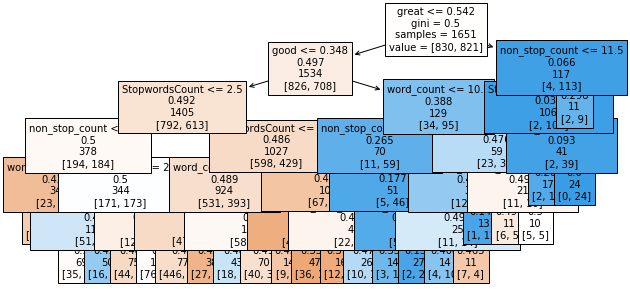

In [23]:
# Needs sklearn 0.21 or higher
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5]);
plot_tree(clf, filled=True, feature_names = feature_names, label='root', fontsize=10)
plt.show();

In [24]:
from sklearn.tree import export_text

print(export_text(clf, feature_names = list(feature_names)))

|--- great <= 0.54
|   |--- good <= 0.35
|   |   |--- StopwordsCount <= 2.50
|   |   |   |--- non_stop_count <= 1.50
|   |   |   |   |--- word_count <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- word_count >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- non_stop_count >  1.50
|   |   |   |   |--- non_stop_count <= 2.50
|   |   |   |   |   |--- StopwordsCount <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- StopwordsCount >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- non_stop_count >  2.50
|   |   |   |   |   |--- word_count <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- word_count >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- StopwordsCount >  2.50
|   |   |   |--- StopwordsCount <= 11.50
|   |   |   |   |--- word_count <= 18.50
|   |   |   |   |   |--- StopwordsCount <= 9.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- StopwordsCount >  9.50
|   |   |   |   |  

In [25]:
#tuner 1 i found online
from tune_sklearn import TuneSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import numpy as np

y = final_df_bow['Polarity']
x = final_df_bow.drop(['Polarity'], axis=1)
X = x.drop(['reviewTextnoStop'], axis=1)
feature_names = X.columns
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()
param_distributions = {
    "n_estimators": randint(20, 80),
    "max_depth": randint(2, 10)
}

tune_search = TuneSearchCV(clf, param_distributions, n_trials=3)

tune_search.fit(x_train, y_train)

pred = tune_search.predict(x_test)
accuracy = np.count_nonzero(np.array(pred) == np.array(y_test)) / len(pred)
print(accuracy)

Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.


0.5804988662131519


In [26]:
#Tuner 2 i found
from tune_sklearn import TuneGridSearchCV
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [27]:
X, y = make_classification(n_samples=11000, n_features=1000, n_informative=50, 
                           n_redundant=0, n_classes=10, class_sep=2.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

# Example parameters to tune from SGDClassifier
parameters = {
   'alpha': [1e-4, 1e-1, 1],
   'epsilon':[0.01, 0.1]
}

In [28]:
#5x more efficient version
tune_search = TuneGridSearchCV(
    SGDClassifier(),
    parameters,
    early_stopping=True,
    max_iters=10
)
import time # Just to compare fit times
start = time.time()
tune_search.fit(X_train, y_train)
end = time.time()
print("Tune Fit Time:", end - start)
pred = tune_search.predict(X_test)
accuracy = np.count_nonzero(np.array(pred) == np.array(y_test)) / len(pred)
print("Tune Accuracy:", accuracy)

Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.


Tune Fit Time: 21.05054020881653
Tune Accuracy: 0.82


In [29]:
#old version
from sklearn.model_selection import GridSearchCV
# n_jobs=-1 enables use of all cores like Tune does
sklearn_search = GridSearchCV(
   SGDClassifier(),
   parameters,
   n_jobs=-1
)

start = time.time()
sklearn_search.fit(X_train, y_train)
end = time.time()
print("Sklearn Fit Time:", end - start)
pred = sklearn_search.predict(X_test)
accuracy = np.count_nonzero(np.array(pred) == np.array(y_test)) / len(pred)
print("Sklearn Accuracy:", accuracy)

#Took longer than grid 59 secs for this vs 21 above. 

Sklearn Fit Time: 64.4804916381836
Sklearn Accuracy: 0.824
